<a href="https://colab.research.google.com/github/Joaomachado69/AI-PMM-ITBI/blob/joao_machado/an-lise-explorat-ria-de-dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font size="10" color="black">Análise exploratória de dados</font>

(Exploratory data analysis - EDA)

Eduardo Chaves Ferreira

## O que será tratado no curso

O curso apresenta uma introdução à análise exploratória de dados (EDA), constituída por: 

- visualização
- análise estatística de dados

## Por que fazer EDA?

1- Ter uma melhor compreensão dos dados

2- Compreendendo, estabelecer padrões

3- Baseado nos padrões, propor hipóteses e confirmá-las (ou não)


Algumas vezes não é necessário criar modelos de mineração, a simples análise exploratória é suficiente para extrair as informações que buscamos.

# 1- Importação de bibliotecas e funções gerais usadas no caderno

In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import pandas as pd
import scipy.stats as stat
import seaborn as sns
import os
import pandas
import sklearn
from IPython.display import Image
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler


# Para ter repetibilidade nos resultados
random_state = 1

# Tratar valores infinitos como np.NaN
pandas.options.mode.use_inf_as_na = True

# IMPORTANTE para tornar figuras interativas
%matplotlib notebook

# Tamanho padrão das figuras
figsize=(10,6)

# Verificação do local para carga de dados
path = os.environ['PATH']

# if path.startswith('C'):
#     IN_KAGGLE = False
# else:
#     IN_KAGGLE = True
    

# Bibliotecas específicas do livro Introduction to Machine Learning with Python
# https://github.com/amueller/introduction_to_ml_with_python
# pip install mglearn

import mglearn


# Configuração do número de linhas e colunas a serem apresentadas em listagens
pd.set_option('display.max_row', 1000)

pd.set_option('display.max_columns', 50)

In [35]:
os.listdir('/content/drive/MyDrive/AI-PMM-ITBI')

['imagem.numpy.npy',
 'municipios_brasileiros.csv',
 'tips.csv',
 'votacao_candidato_2018_ES.csv',
 '2015.csv',
 '2019.csv',
 '2018.csv',
 '2017.csv',
 '2016.csv']

In [36]:
# Função de conversão de dados copiada de https://github.com/shakedzy/dython/blob/master/dython/_private.py
# Autor Shaked Zychlinski

def convert(data, to):
    converted = None
    if to == 'array':
        if isinstance(data, np.ndarray):
            converted = data
        elif isinstance(data, pd.Series):
            converted = data.values
        elif isinstance(data, list):
            converted = np.array(data)
        elif isinstance(data, pd.DataFrame):
            converted = data.as_matrix()
    elif to == 'list':
        if isinstance(data, list):
            converted = data
        elif isinstance(data, pd.Series):
            converted = data.values.tolist()
        elif isinstance(data, np.ndarray):
            converted = data.tolist()
    elif to == 'dataframe':
        if isinstance(data, pd.DataFrame):
            converted = data
        elif isinstance(data, np.ndarray):
            converted = pd.DataFrame(data)
    else:
        raise ValueError("Unknown data conversion: {}".format(to))
    if converted is None:
        raise TypeError('cannot handle data conversion of type: {} to {}'.format(type(data),to))
    else:
        return converted

# 2- Carga de dados

## Dados de exemplo

World happiness report (http://worldhappiness.report/).

Somente variáveis numéricas

In [37]:
if drive:
    world_happiness = pd.read_csv("/content/drive/MyDrive/AI-PMM-ITBI/2016.csv")
else:
    world_happiness = pd.read_csv("2016.csv")

# Conjunto completo
world_happiness = world_happiness.loc[:,['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual']]



#world_happiness = shuffle(world_happiness).reset_index(drop=True)

# Conjunto resumido para treinamento de modelos
world_happiness_resumido = world_happiness.loc[:,[ 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity']]

# Cria variáveis para treinamento de modelos

colunas_fonte = [ 
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity'
]

colunas_objetivo = [ 
       'Happiness Score'
]

world_happiness_resumido_X = world_happiness_resumido.loc[:,colunas_fonte] 
world_happiness_resumido_Y = world_happiness_resumido.loc[:,colunas_objetivo]


world_happiness.head(35)

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596
5,Canada,North America,6,7.404,1.44015,1.09610,0.82760,0.57370,0.31329,0.44834,2.70485
6,Netherlands,Western Europe,7,7.339,1.46468,1.02912,0.81231,0.55211,0.29927,0.47416,2.70749
7,New Zealand,Australia and New Zealand,8,7.334,1.36066,1.17278,0.83096,0.58147,0.41904,0.49401,2.47553
8,Australia,Australia and New Zealand,9,7.313,1.44443,1.10476,0.85120,0.56837,0.32331,0.47407,2.54650
9,Sweden,Western Europe,10,7.291,1.45181,1.08764,0.83121,0.58218,0.40867,0.38254,2.54734


## Carrega dados para exercício

Data set de gorgetas com variáveis categóricas

In [38]:
if drive:
    tips = pd.read_csv('/content/drive/MyDrive/AI-PMM-ITBI/tips.csv')
    if 'Unnamed: 0' in tips.columns:
        tips.drop(['Unnamed: 0'], inplace=True, axis=1)
else:
    tips = sns.load_dataset('tips')

tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [39]:
tips2 = tips.copy();

In [40]:
tips2.columns = ['Valor_Conta','Gorjeta','Sexo','Fumante','Tempo','Horário','Clientes']
tips2.Valor_Conta = tips2.Valor_Conta*4
tips2.Gorjeta = tips2.Gorjeta*4
tips2.head()

,Valor_Conta,Gorjeta,Sexo,Fumante,Tempo,Horário,Clientes
0,67.96,4.04,Female,No,Sun,Dinner,2
1,41.36,6.64,Male,No,Sun,Dinner,3
2,84.04,14.00,Male,No,Sun,Dinner,3
3,94.72,13.24,Male,No,Sun,Dinner,2
4,98.36,14.44,Female,No,Sun,Dinner,4


Dados sobre tumores (somente informações numéricas)

http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html

In [41]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

cancer_data = cancer['data']
# 1 benigno, 0 maligno
cancer_target = cancer['target']
cancer_target_names  = cancer['target_names']
cancer_feature_names = cancer['feature_names']

In [42]:
cancer_data_DF = pd.DataFrame(cancer_data,columns=cancer_feature_names) 
cancer_data_DF.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [43]:
cancer_target_DF = pd.DataFrame(cancer_target,columns=['target']) 
cancer_target_DF.head()

,target
0,0
1,0
2,0
3,0
4,0


# 3 - Obtendo informações gerais sobre os dados

## Dados exemplo

In [44]:
# Estatísticas básicas
# Verificar mínimos e máximos para garantir se estão dentro dos limites esperados
# Verificar intervalo de variação da medida
# Verificar possíveis outliers

world_happiness.describe()

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,78.980892,5.382185,0.953880,0.793621,0.557619,0.370994,0.137624,0.242635,2.325807
std,45.466030,1.141674,0.412595,0.266706,0.229349,0.145507,0.111038,0.133756,0.542220
min,1.000000,2.905000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.817890
25%,40.000000,4.404000,0.670240,0.641840,0.382910,0.257480,0.061260,0.154570,2.031710
50%,79.000000,5.314000,1.027800,0.841420,0.596590,0.397470,0.105470,0.222450,2.290740
75%,118.000000,6.269000,1.279640,1.021520,0.729930,0.484530,0.175540,0.311850,2.664650
max,157.000000,7.526000,1.824270,1.183260,0.952770,0.608480,0.505210,0.819710,3.837720


In [45]:
# Verificar tipos de dados

world_happiness.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [46]:
# Verificar nulos

world_happiness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Region                         157 non-null    object 
 2   Happiness Rank                 157 non-null    int64  
 3   Happiness Score                157 non-null    float64
 4   Economy (GDP per Capita)       157 non-null    float64
 5   Family                         157 non-null    float64
 6   Health (Life Expectancy)       157 non-null    float64
 7   Freedom                        157 non-null    float64
 8   Trust (Government Corruption)  157 non-null    float64
 9   Generosity                     157 non-null    float64
 10  Dystopia Residual              157 non-null    float64
dtypes: float64(8), int64(1), object(2)
memory usage: 13.6+ KB


## Verificando dados ausentes

Dados ausentes são representados como np.NaN

São dados nulos ou não preenchidos

A função isnull verifica se os dados existem (True) ou não (False)

Há também a função isna, que é idêntica a isnull

CUIDADO: além de dados nulos há também dados que tendem ao infinito (inf ou -inf), fruto, por exemplo, de divisão por zero. Para que sejam considerados nulos usar pandas.options.mode.use_inf_as_na = True

In [47]:
# Verificar nulos
pandas.options.mode.use_inf_as_na = True
world_happiness.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [48]:
# Para listar dados nulos

df = pd.DataFrame([[0, np.NaN, 2], 
                   [3, 4, np.NaN], 
                   [6, 7, 8]])


df[df.isnull().any(axis=1)]

,0,1,2
0,0,NaN,2.0
1,3,4.0,NaN


## Contagem de valores (categóricos ou numéricos)

In [49]:
world_happiness.Region.value_counts()

Sub-Saharan Africa                 38
Central and Eastern Europe         29
Latin America and Caribbean        24
Western Europe                     21
Middle East and Northern Africa    19
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64

In [50]:
world_happiness.head()

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [51]:
world_happiness.groupby(['Region']).agg({'Country' : 'count', 'Happiness Rank' : 'mean', 'Happiness Score' : 'mean'}).sort_values(by=['Happiness Score'], ascending=False)

,Country,Happiness Rank,Happiness Score
Region,,,
Australia and New Zealand,2,8.500000,7.323500
North America,2,9.500000,7.254000
Western Europe,21,29.190476,6.685667
Latin America and Caribbean,24,48.333333,6.101750
Eastern Asia,6,67.166667,5.624167
Middle East and Northern Africa,19,78.105263,5.386053
Central and Eastern Europe,29,78.448276,5.370690
Southeastern Asia,9,80.000000,5.338889
Southern Asia,7,111.714286,4.563286


In [52]:
# Observar a duplicidade de valores

world_happiness['Happiness Rank'].value_counts().head()

57     2
34     2
145    2
1      1
108    1
Name: Happiness Rank, dtype: int64

## Estatísticas gerais

Observação sobre medidas de forma: 
Curtose (achatamento, onde 0 caracteriza a normal, maior que 0 representa afunilamento e menor que 0 achatamento) e 
Assimetria (skewness, onde 0 caracteriza simetria, maior que 0 caracteriza maior distribuição à direira e menor que 0 caracteriza maior distribuição à esquerda)

In [53]:

DescribeResult = stats.describe(world_happiness_resumido_X)
minmax = DescribeResult[1]
mean = DescribeResult[2]
variance = DescribeResult[3]
skewness = DescribeResult[4]
kurtosis = DescribeResult[5]

kurtosis

array([-0.72599984,  0.1574113 , -0.62850315, -0.63216706,  1.27272196,
        1.47108939])

<br>
<font size="8" color="red">EXERCÍCIO</font>

Faça as análises acima para tips.

Usando value_counts, verifique os valores presentes nas variáveis categóricas

In [54]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [55]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [56]:
tips.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [57]:
tips.day.value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [58]:
tips.time.value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

In [59]:
tips.sex.value_counts()

Male      157
Female     87
Name: sex, dtype: int64

In [60]:
tips.smoker.value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

<br>
<font size="8" color="red">EXERCÍCIO</font>

Faça as análises acima para cancer_data.

Use value_counts para verificar os valores de target

In [61]:
cancer_data_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [62]:
cancer_data_DF.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [63]:
cancer_data_DF.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [64]:
DescribeResult = stats.describe(cancer.data)
minmax = DescribeResult[1]
mean = DescribeResult[2]
variance = DescribeResult[3]
skewness = DescribeResult[4]
kurtosis = DescribeResult[5]

kurtosis

array([ 0.82758367,  0.74114542,  0.95316505,  3.60976126,  0.83794535,
        1.62513952,  1.97059165,  1.04668022,  1.26611697,  2.9690169 ,
       17.52116219,  5.29175289, 21.20377481, 48.76719561, 10.3675372 ,
        5.05096602, 48.42256209,  5.07083973,  7.81638799, 26.03994977,
        0.9252876 ,  0.21180938,  1.05024268,  4.3473308 ,  0.50275975,
        3.00212021,  1.59056807, -0.54136707,  4.39507329,  5.18811128])

In [65]:
cancer_target_DF.target.value_counts()

1    357
0    212
Name: target, dtype: int64

# 4- Visualização de Dados

## Visualização usando Matplotlib ou Seaborn?

Matplotlib é a biblioteca mais usada para plotagem. Rápida e fácil de usar. Produz gráficos simples rapidamente e permite a criação de gráficos sofisticados.

https://matplotlib.org/

https://matplotlib.org/tutorials/introductory/sample_plots.html

Seaborn é uma biblioteca baseada na Matplotlib, com recusrsos visuais mais sofisticados, principalmente para análise estatística.

https://seaborn.pydata.org/

https://seaborn.pydata.org/tutorial.html#tutorial

Usaremos ambas no curso

# 4.1 - Visualização Básica

O mínimo necessário para o desenho de gráficos

https://www.oreilly.com/library/view/python-data-science/9781491912126/ch04.html

In [66]:
# Dados para plotagem
x = np.linspace(0, 10, 100)
x_ = np.linspace(0, 10, 10)

In [67]:
import matplotlib as mpl
import matplotlib.pyplot as plt

##### FORMA 1 -  Cria figura com múltiplas imagens sem trabalhar com eixos
fig = plt.figure(figsize=figsize)

# Seleciona local para plot
plt.subplot(2, 1, 1)

# Linha colorida
plt.plot(x, np.sin(x), color='blue', linestyle='-', label='sin(x)')
# Títulos
plt.title('Seno')
plt.xlabel('x')
plt.ylabel('sen')

# Limites de plotagem
plt.xlim(-1, 11)
plt.ylim(-1.5, 1.5)

# Seleciona local para plot
plt.subplot(2, 1, 2)

# Linha gray scale
plt.plot(x, np.cos(x), color='0.4', linestyle='--', label='sin(x)')
plt.title('Cosseno')
plt.xlabel('x')
plt.ylabel('cos')

# Limites de plotagem
plt.xlim(-1, 11)
plt.ylim(-1.5, 1.5)

fig.subplots_adjust(hspace=0.4, wspace=0.4)


plt.tight_layout()
# plt.axis('tight')

plt.show()

<IPython.core.display.Javascript object>

In [68]:
##### FORMA 2 -  Cria figura com múltiplas imagens trabalhando com eixos
fig, ax = plt.subplots(2, 1, figsize=figsize)

ax[0].plot(x, np.sin(x))
ax[0].set_xlabel('x')
ax[0].set_ylabel('sin')
ax[0].set_title('Sin')

ax[1].plot(x, np.cos(x))
ax[1].set_xlabel('x')
ax[1].set_ylabel('cos')
ax[1].set_title('cos')

plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>

In [69]:
##### FORMA 3 -  Cria figura simples 
fig = plt.figure(figsize=figsize)
ax = plt.axes()

plt.plot(x, np.sin(x), color='blue', linestyle='-', label='sin(x)', linewidth=1)
plt.errorbar(x_, np.sin(x_), yerr=0.1, fmt='.k')
plt.fill_between(x, 1.1*np.sin(x), 0.9*np.sin(x), color='gray', alpha=0.2)


plt.plot(x, np.cos(x), color='0.4', linestyle='--', label='cos(x)', linewidth=4)
plt.scatter(x_, np.cos(x_), marker='o')

# Limites de plotagem
plt.xlim(-1, 11)
plt.ylim(-1.5, 1.5)

# Títulos
plt.title('Seno Cosseno')
plt.xlabel('x')
plt.ylabel('sen cos')

# Anotações
style = dict(size=15, color='gray')
plt.text(6, np.cos(6)+0.2, "Teste", **style)


# Torna legenda visívil
plt.legend()

# Grid
plt.grid(True) 

# Rotaciona labels
plt.xticks(rotation=60)

plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>

# 4.2 - Visualização para análise de dados

## Plotar variável X índice

Pode trazer informações interessantes de tendência se plotarmos variável X índice, mesmo que não trabalhemos com séries temporais. 

No mínimo verificaremos se os dados foram embaralhados

In [70]:
plt.subplots(figsize=figsize)
plt.plot(range(len(world_happiness)), 
         world_happiness.loc[:,['Happiness Score']],
         'r.'
         )
plt.xlabel('Índice')
plt.ylabel('Happiness Score')
plt.title('Plot ìndice X valor')
plt.grid(True)
plt.show()
plt.tight_layout()

<IPython.core.display.Javascript object>

#### <br>
<font size="8" color="red">EXERCÍCIO: Plotar variável X índice</font>

Para tips e cancer_data plotar a variável objetivo X índice

In [71]:
plt.subplots(figsize=figsize)
plt.plot(range(len(tips)), 
         tips.tip,
         'r.'
         )
plt.xlabel('Índice')
plt.ylabel('Tips')
plt.title('Plot ìndice X Tips')
plt.grid(True)
plt.show()
plt.tight_layout()

<IPython.core.display.Javascript object>

In [72]:
plt.subplots(figsize=figsize)
plt.plot(range(len(cancer_target_DF)), 
         cancer_target_DF.target,
         'r.'
         )
plt.xlabel('Índice')
plt.ylabel('Target')
plt.title('Plot ìndice X Target')
plt.grid(True)
plt.show()
plt.tight_layout()

<IPython.core.display.Javascript object>

## Plotar variável X variável

In [73]:
plt.subplots(figsize=figsize)

wh_ = world_happiness.loc[:,['Economy (GDP per Capita)','Happiness Score']].values

plt.plot(wh_[:,0], 
         wh_[:,1],
         'r.'
         )

plt.xlabel('Economy (GDP per Capita)')
plt.ylabel('Happiness Score')
plt.title('Economy (GDP per Capita) X Happiness Score')
plt.grid(True)
plt.show()
plt.tight_layout()

<IPython.core.display.Javascript object>

In [74]:
# joinplot é limitado em argumentos, preferencialmente usar scatter plot
# há, porém, a vantagem de apresentar as distribuições das variáveis em análise
wh_ = world_happiness.loc[:,['Economy (GDP per Capita)','Happiness Score']].values
with sns.axes_style("whitegrid"):
    g = sns.jointplot(x=wh_[:,0], y=wh_[:,1], height=figsize[0])
    g.set_axis_labels('Economy (GDP per Capita)','Happiness Score')

<IPython.core.display.Javascript object>

# Scatter plot

In [75]:
fig = plt.figure(figsize=figsize)

wh_ = world_happiness.loc[:,['Economy (GDP per Capita)','Happiness Score']].values

plt.scatter(wh_[:,0], wh_[:,1], c=wh_[:,1], s=wh_[:,0]*100, alpha=0.3,
                   cmap='viridis')
plt.colorbar()
plt.xlabel('Economy (GDP per Capita)')
plt.ylabel('Happiness Score')
plt.title('Economy (GDP per Capita) X Happiness Score')
plt.grid(True) 
plt.show()

<IPython.core.display.Javascript object>

#### <br>
<font size="8" color="red">EXERCÍCIO: Plotar variável X variável</font>

Para tips, plotar tip X bill. Fazer joinplot com mesmas variáveis. Fazer scatter com as mesmas variáveis, ajustando tamanho e cor por tip.

Para cancer_data, plotar mean radius X mean compactness, ajustando tamanho e cor por target

In [76]:
tips2.head()

,Valor_Conta,Gorjeta,Sexo,Fumante,Tempo,Horário,Clientes
0,67.96,4.04,Female,No,Sun,Dinner,2
1,41.36,6.64,Male,No,Sun,Dinner,3
2,84.04,14.00,Male,No,Sun,Dinner,3
3,94.72,13.24,Male,No,Sun,Dinner,2
4,98.36,14.44,Female,No,Sun,Dinner,4


In [77]:
plt.subplots(figsize=figsize)

tips_ = tips2.loc[:,['Valor_Conta','Gorjeta']].values

plt.plot(tips_[:,0], 
         tips_[:,1],
         'k.'
         )

plt.xlabel('Valor_Conta')
plt.ylabel('Gorjeta')
plt.title('Valor_Conta X Gorjeta')
plt.grid(True)
plt.show()
plt.tight_layout()

<IPython.core.display.Javascript object>

In [78]:
np.var(tips2.Valor_Conta, ddof=1)

1268.0470178236524

In [79]:
np.cov(tips2.Valor_Conta,tips2.Gorjeta, ddof=1)

array([[1268.04701782,  133.17602607],
       [ 133.17602607,   30.63127421]])

In [80]:
np.corrcoef(tips2.Valor_Conta,tips2.Gorjeta)

array([[1.        , 0.67573411],
       [0.67573411, 1.        ]])

In [81]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(np.reshape(tips2.Valor_Conta.values,(len(tips2.Valor_Conta.values),1)),tips2.Gorjeta.values)

# Make predictions using the testing set
tips_pred = regr.predict(np.reshape(tips2.Valor_Conta.values,(len(tips2.Valor_Conta.values),1)))

# The coefficients
print('Coefficients: \n', regr.coef_, regr.intercept_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(tips2.Gorjeta, tips_pred))
print('Soma dos erros: {}'.format(np.sum(tips2.Gorjeta-tips_pred)))
plt.subplots(figsize=figsize)
plt.scatter(tips2.Valor_Conta,tips2.Gorjeta,  color='black')
plt.plot(tips2.Valor_Conta, tips_pred, color='black', linewidth=3)



plt.xlabel('Valor_Conta')
plt.ylabel('Gorjeta')
plt.title('Valor_Conta X Gorjeta')
plt.grid(True)
plt.show()
plt.tight_layout()

Coefficients: 
 [0.10502452] 3.6810784542186923
Mean squared error: 16.58
Soma dos erros: 4.973799150320701e-13


<IPython.core.display.Javascript object>

In [82]:

tips_ = tips.loc[:,['total_bill','tip']].values

g = sns.jointplot(x=tips_[:,0], y=tips_[:,1], height=figsize[0])
g.set_axis_labels('total_bill','tip')

<IPython.core.display.Javascript object>

In [83]:
fig = plt.figure(figsize=figsize)

tips_ = tips.loc[:,['total_bill','tip']].values


plt.scatter(tips_[:,0], tips_[:,1], c=tips_[:,1], s=tips_[:,0]*10, alpha=0.3,
                   cmap='viridis')
plt.colorbar()
plt.xlabel('total_bill')
plt.ylabel('tip')
plt.title('total_bill X tip')
plt.grid(True) 
plt.show()

<IPython.core.display.Javascript object>

In [84]:
fig = plt.figure(figsize=figsize)

tips_ = cancer_data_DF.loc[:,['mean radius','mean compactness']].values


plt.scatter(tips_[:,0], tips_[:,1], c=cancer_target_DF.target, s=(cancer_target_DF.target+1)*50, alpha=0.3,
                   cmap='viridis')
plt.colorbar()
plt.xlabel('total_bill')
plt.ylabel('tip')
plt.title('total_bill X tip')
plt.grid(True) 
plt.show()

<IPython.core.display.Javascript object>

## Plotagem de variáveis categóricas

In [85]:
fig, ax = plt.subplots(1, 1, figsize=figsize)
tips.sex.value_counts().plot(kind='pie', ax=ax)

<IPython.core.display.Javascript object>

In [86]:
fig, ax = plt.subplots(figsize = figsize)

size = 0.3



day_counts = tips.day.value_counts()


cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(len(day_counts))*5)

ax.pie(
    day_counts, 
    radius=1, 
    colors=outer_colors,
    labels = day_counts.index.values,
       wedgeprops=dict(width=size, edgecolor='w'))

#ax.pie(benford, radius=1-size, colors=outer_colors,
#       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title='Refeições por dia da semana')
plt.show()

<IPython.core.display.Javascript object>

In [87]:
fig, ax = plt.subplots(1, 1, figsize=figsize)
tips.time.value_counts().plot(kind='bar', ax=ax)

<IPython.core.display.Javascript object>

In [88]:
fig, ax = plt.subplots(1, 1, figsize=figsize)
sns.barplot(x="day", y="total_bill", hue="sex", data=tips, ax=ax)

<IPython.core.display.Javascript object>

In [89]:
fig, ax = plt.subplots(1, 1, figsize=figsize)
tips.day.value_counts().plot(kind='area', ax=ax)
contadores = tips.day.value_counts()
_ = plt.xticks(range(len(contadores)), contadores.index.values, rotation='vertical')

<IPython.core.display.Javascript object>

#### <br>
<font size="8" color="red">EXERCÍCIO: Plotagem de variáveis categóricas</font>

Para tips plotar, na mesma figura, gráficos de barras horizontais, barras verticais, pizza e área para total de tips por smoker, day, sex e time

In [90]:
fig, ax = plt.subplots(2, 2, figsize=figsize)



tips_ = tips.groupby(['smoker'])['tip'].sum()
ax_ = ax[0,0]
tips_.plot(kind='bar', ax=ax_)
ax_.set_xlabel('Smoker')
ax_.set_ylabel('Tip')
ax_.set_title('Tip X Smoker')

tips_ = tips.groupby(['sex'])['tip'].sum()
ax_ = ax[0,1]
tips_.plot(kind='barh', ax=ax_)
ax_.set_xlabel('Tip')
ax_.set_ylabel('Sex')
ax_.set_title('Tip X Sex')

tips_ = tips.groupby(['day'])['tip'].sum()
ax_ = ax[1,0]
tips_.plot(kind='pie', ax=ax_)
ax_.set_xlabel('Day')
ax_.set_ylabel('Tip')
ax_.set_title('Tip X Day')

tips_ = tips.groupby(['time'])['tip'].sum()
ax_ = ax[1,1]
tips_.plot(kind='area', ax=ax_)
ax_.set_xlabel('Time')
ax_.set_ylabel('Tip')
ax_.set_title('Tip X Time')
contadores = tips.time.value_counts()
_ = plt.xticks(range(len(contadores)), contadores.index.values, rotation='vertical')

fig.subplots_adjust(hspace=0.6, wspace=0.4)
plt.show()

<IPython.core.display.Javascript object>

## Mosaico

In [91]:
tips.groupby(['day','time'])['tip'].count()

day   time  
Fri   Dinner    12
      Lunch      7
Sat   Dinner    87
Sun   Dinner    76
Thur  Dinner     1
      Lunch     61
Name: tip, dtype: int64

In [92]:
from statsmodels.graphics.mosaicplot import mosaic

fig, ax = plt.subplots(1, 1, figsize=figsize)


_=mosaic(tips.loc[:,['day','time']], index =['day','time'], ax=ax, statistic=False, gap=0.01, title='Distribuição de refeições')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


<IPython.core.display.Javascript object>

#### <br>
<font size="8" color="red">EXERCÍCIO: Mosaico</font>

Para tips, cruzar day e smoker

In [93]:
import statsmodels
print(statsmodels.__version__)

0.12.2


In [94]:
from statsmodels.graphics.mosaicplot import mosaic

fig, ax = plt.subplots(1, 1, figsize=figsize)


_=mosaic(tips.loc[:,['day','smoker']], index =['day','smoker'], ax=ax, statistic=False, gap=0.01, title='Distribuição de refeições')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


<IPython.core.display.Javascript object>

## Histogramas

In [95]:
# Histograma dos dados

fig, ax = plt.subplots(1, 1, figsize=figsize)

world_happiness_resumido.hist(bins=30, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False, ax=ax)    
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


<IPython.core.display.Javascript object>

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  


## Histograma comparando dados de entrada com objetivo

In [96]:
fig, axes = plt.subplots(6, 1, figsize=figsize)
ruins = world_happiness_resumido.loc[world_happiness_resumido['Happiness Score']<=5.5,:]
bons = world_happiness_resumido.loc[world_happiness_resumido['Happiness Score']>5.5,:]
ax = axes.ravel()
for i in range(6):
    _, bins = np.histogram(world_happiness_resumido.loc[:,colunas_fonte[i]], bins=50)
    ax[i].hist(ruins.loc[:,colunas_fonte[i]], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(bons.loc[:,colunas_fonte[i]], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(colunas_fonte[i],size = 6)
    ax[i].set_yticks(())

ax[0].legend(["tristes", "felizes"], loc="best")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>

## Histogramas de treinamento e teste

Quando recebemos bases de treinamento e teste já prontas (ex. competições Kaggle) ou quando montamos nossas bases, é importante verificar se pertencem a mesma distribuição

In [97]:
x_train, x_test, y_train, y_test = train_test_split(
    world_happiness_resumido_X, world_happiness_resumido_Y, test_size=0.3, random_state=random_state,shuffle =True)

In [98]:
f, ax = plt.subplots(1, 1, figsize=figsize)
plt.hist(y_train.T, bins=20, alpha=0.5, label='train')
plt.hist(y_test.T, bins=20, alpha=0.5, label='test')
f.suptitle('Happiness Score - Train Test')
plt.legend(loc='upper right')
plt.show()
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>

#### <br>
<font size="8" color="red">EXERCÍCIO: Histogramas</font>

Para tips e cancer_data realizar as seguintes análises:
- Histograma dos dados
- Para cancer_data, plotar histograma das variáveis de entrada separando cada gráfico em dois histogramas (maligno e benigno)

In [99]:
fig, ax = plt.subplots(1, 1, figsize=figsize)

_ = tips.hist(bins=30, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False, ax=ax)    
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


In [100]:
fig, ax = plt.subplots(1, 1, figsize=figsize)

_ = cancer_data_DF.hist(bins=30, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False, ax=ax)    
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


In [101]:
fig, axes = plt.subplots(15, 2, figsize=figsize)
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]
ax = axes.ravel()
for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i],size = 6)
    ax[i].set_yticks(())
ax[0].set_xlabel("Feature magnitude",size = 6)
ax[0].set_ylabel("Frequency",size = 6)
ax[0].legend(["malignant", "benign"], loc="best")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>

## BoxPlot

Excelente ferramenta para análise de distribuições e outliers

In [102]:
f, ax = plt.subplots(1, 1, figsize=figsize)
f.suptitle('Happiness Score')

sns.boxplot(x="Region", y="Happiness Score", data=world_happiness,  ax=ax)
ax.set_xlabel("Region",size = 12,alpha=0.8)
ax.set_ylabel("Happiness Score",size = 12,alpha=0.8)
plt.xticks(rotation=60)
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>

In [103]:
f, ax = plt.subplots(1, 1, figsize=figsize)
f.suptitle('world_happiness')

sns.boxplot(data=world_happiness_resumido,  ax=ax)
ax.set_xlabel("Atributos",size = 12,alpha=0.8)
ax.set_ylabel("Valores",size = 12,alpha=0.8)
plt.xticks(rotation=60)
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>

#### <br>
<font size="8" color="red">EXERCÍCIO: Boxplot</font>

Para tips e cancer_data realizar as seguintes análises:
- Boxplot dos dados
- No caso de tips, boxplot de tip agrupado por time, sex e smoker

In [104]:
f, ax = plt.subplots(1, 1, figsize=figsize)
f.suptitle('Tips', fontsize=14)

sns.boxplot(x="time", y="tip", data=tips,  ax=ax)
ax.set_xlabel("time",size = 12,alpha=0.8)
ax.set_ylabel("tip",size = 12,alpha=0.8)
plt.xticks(rotation=60)
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>

In [105]:
fig, ax = plt.subplots(1, 1, figsize=figsize)
tips.boxplot('tip','sex',figsize=figsize, ax=ax)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


In [106]:
fig, ax = plt.subplots(1, 1, figsize=figsize)
tips.boxplot('tip','smoker',figsize=figsize, ax=ax)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


In [107]:
f, ax = plt.subplots(1, 1, figsize=figsize)
f.suptitle('Tips', fontsize=14)

sns.boxplot(data=tips,  ax=ax)
ax.set_xlabel("Atributos",size = 12,alpha=0.8)
ax.set_ylabel("Valores",size = 12,alpha=0.8)
plt.xticks(rotation=60)
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>

In [108]:
f, ax = plt.subplots(1, 1, figsize=figsize)
f.suptitle('Cancer data', fontsize=14)

sns.boxplot(data=cancer_data_DF,  ax=ax)
ax.set_xlabel("Atributos",size = 12,alpha=0.8)
ax.set_ylabel("Valores",size = 12,alpha=0.8)
plt.xticks(rotation=60)
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>

## Correlações

In [109]:
# Correlação entre dados

f, ax = plt.subplots(figsize=figsize)
corr = world_happiness_resumido.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Correlação entre variáveis', fontsize=14)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


<IPython.core.display.Javascript object>

In [110]:
f, ax = plt.subplots(figsize=figsize)
_ = pd.plotting.scatter_matrix(world_happiness_resumido, ax=ax)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  


In [111]:
# Correlação entre dados

pp = sns.pairplot(world_happiness_resumido, size=1.8, aspect=1.8,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(shade=True))

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('world_happiness', fontsize=14)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1242: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


<IPython.core.display.Javascript object>

#### <br>
<font size="8" color="red">EXERCÍCIO: Correlações</font>

Para tips e cancer_data realizar as seguintes análises:
- Correlações (heatmap) entre dados numéricos de tips e cancer_data

In [112]:
# Correlação entre dados

f, ax = plt.subplots(figsize=figsize)
corr = tips.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Correlação entre variáveis', fontsize=14)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


<IPython.core.display.Javascript object>

In [113]:
# Correlação entre dados

f, ax = plt.subplots(figsize=figsize)
corr = pd.concat([cancer_data_DF, cancer_target_DF], axis=1).corr()
hm = sns.heatmap(round(corr,1), annot=True, ax=ax, cmap="coolwarm",fmt='.0f',
                 linewidths=.05)
f.subplots_adjust(bottom=0.3)
t= f.suptitle('Correlação entre variáveis', fontsize=14)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


<IPython.core.display.Javascript object>

## Coordenadas paralelas

In [114]:
from pandas.plotting import parallel_coordinates
fig, ax = plt.subplots(1, 1, figsize=figsize)

parallel_coordinates(frame=world_happiness, class_column='Region'
                     #, color = ('r','g','b','y','w')
                     , ax = ax, cols=['Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'])
plt.xticks(rotation=40)
plt.subplots_adjust(bottom=0.30)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<IPython.core.display.Javascript object>

#### <br>
<font size="8" color="red">EXERCÍCIO: Coordenadas paralelas</font>

Para tips e cancer_data realizar as seguintes análises:
- Para cancer_data gráfico de coordenadas paralelas (class_column = target)

In [115]:
from pandas.plotting import parallel_coordinates
fig, ax = plt.subplots(1, 1, figsize=figsize)

parallel_coordinates(frame=pd.concat([cancer_data_DF, cancer_target_DF], axis=1), 
                     class_column='target'
                     , ax = ax, )
plt.xticks(rotation=60)
fig.subplots_adjust(bottom=0.3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<IPython.core.display.Javascript object>

## Visão 3D dos dados

In [116]:
# Visão 3D dos dados

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111, projection='3d')

xs = world_happiness_resumido['Economy (GDP per Capita)']
ys = world_happiness_resumido['Family']
zs = world_happiness_resumido['Health (Life Expectancy)']
ax.scatter(xs, ys, zs, s=world_happiness_resumido['Happiness Score']**3, alpha=0.6, edgecolors='w')

ax.set_xlabel('Economy (GDP per Capita)')
ax.set_ylabel('Family')
ax.set_zlabel('Health (Life Expectancy)')
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


<IPython.core.display.Javascript object>

#### <br>
<font size="8" color="red">EXERCÍCIO: Visão 3D</font>

Para tips e cancer_data realizar as seguintes análises:
- Visão 3D de tips usando total_bill, size e tip (tamanho da bolha proporcional à tip)

In [117]:
# Visão 3D dos dados

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111, projection='3d')

xs = tips['total_bill']
ys = tips['size']
zs = tips['tip']
ax.scatter(xs, ys, zs, s=tips['tip']*10, alpha=0.6, edgecolors='w')

ax.set_xlabel('total_bill')
ax.set_ylabel('size')
ax.set_zlabel('tip')
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


<IPython.core.display.Javascript object>

## Imagens

In [118]:
#from sklearn.datasets import fetch_lfw_people
#people = fetch_lfw_people(min_faces_per_person=100, resize=1)
# people = people.images[0]
people = np.load('/content/drive/MyDrive/AI-PMM-ITBI/imagem.numpy.npy')

### Lista de colormaps
https://matplotlib.org/users/colormaps.html

In [119]:
fig = plt.figure(figsize=(5,5))
ax = plt.axes()
ax.imshow(people)
ax.set_title('teste')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'teste')

In [120]:
plt.imshow(people, cmap="hot")

In [121]:
plt.imshow(people, cmap="Greys")

## Contornos 2D

In [122]:
image_shape = people.shape
print(image_shape)
# linspace(start, stop, num)
x = np.linspace(0, image_shape[1], image_shape[1])
# multiplica por -1 caso contrário imagem fica invertida
y = -1*np.linspace(0, image_shape[0], image_shape[0])

(125, 94)


In [123]:
fig = plt.figure(figsize=(9,12))

plt.contour(x,y,people, 30, cmap='RdGy')
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>

## Contornos 3D

In [124]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(9,9))

ax = plt.axes(projection='3d')
# meshgrid cria matriz bidimensional cruzando todos os valores de x com y
# X repete x tantas linhas quanto a dimensão de y
X, Y = np.meshgrid(x, y)
# usa log para atenuar profundidade das curvas
ax.contour3D(X, Y, np.log(people), 100)
# Ângulo de visão superior e rotação da imagem
ax.view_init(80, -60)

plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


<IPython.core.display.Javascript object>

/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:304: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self._segments3d = np.asanyarray(segments)


## Wire Frame

In [125]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(9,9))

ax = plt.axes(projection='3d')

X, Y = np.meshgrid(x, y)

ax.plot_wireframe(X, Y, np.log(people))

ax.view_init(80, -60)

plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


<IPython.core.display.Javascript object>

## Superfície

In [126]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(9,9))

ax = plt.axes(projection='3d')

X, Y = np.meshgrid(x, y)

ax.plot_surface(X, Y, np.log(people), rstride=1, cstride=1,
                       cmap='viridis', edgecolor='none')

ax.view_init(80, -60)

plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


<IPython.core.display.Javascript object>

## Barras 3D

In [127]:
# Copiado de https://matplotlib.org/gallery/mplot3d/3d_bars.html

from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import


# setup the figure and axes
fig = plt.figure(figsize=figsize)
ax1 = fig.add_subplot(121, projection='3d')


# fake data
_x = np.arange(4)
_y = np.arange(5)
_xx, _yy = np.meshgrid(_x, _y)
x, y = _xx.ravel(), _yy.ravel()

top = x + y
bottom = np.zeros_like(top)
width = depth = 1

ax1.bar3d(x, y, bottom, width, depth, top, shade=True)
ax1.set_title('Shaded')


plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys


<IPython.core.display.Javascript object>

## Mapas

Necessário instalar biblioteca basemap

conda install basemap
https://www.oreilly.com/library/view/python-data-science/9781491912126/ch04.html

In [128]:
pip install basemap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [129]:
import mpl_toolkits.basemap
mpl_toolkits.basemap.__version__

'1.3.4'

In [130]:

from mpl_toolkits.basemap import Basemap

In [131]:
fig = plt.figure(figsize=(15, 8))
m = Basemap(projection='lcc', resolution='c',
            lat_0=-17, lon_0=-47.92,
            width=8000000, height=5000000)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')
x, y = m(-47.92, -15.78)
plt.plot(x, y, 'ok', markersize=5)
plt.text(x, y, 'Brasilia', fontsize=12)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>

Text(4000000.0, 2635667.9822013136, 'Brasilia')

#### <br>
<font size="8" color="red">EXERCÍCIO: Mapas</font>

Plotar todas as capitais de municípios

In [132]:
os.listdir('/content/drive/MyDrive/AI-PMM-ITBI')

['imagem.numpy.npy',
 'municipios_brasileiros.csv',
 'tips.csv',
 'votacao_candidato_2018_ES.csv',
 '2015.csv',
 '2019.csv',
 '2018.csv',
 '2017.csv',
 '2016.csv']

In [133]:
municipios = pd.read_csv('/content/drive/MyDrive/AI-PMM-ITBI/municipios_brasileiros.csv')
if 'Unnamed: 0' in municipios.columns:
    municipios.drop(['Unnamed: 0'], inplace=True, axis=1)
    
municipios_capital = municipios.loc[municipios.capital==1,:]
municipios_capital.reset_index(inplace=True)
municipios_capital.head()

,index,codigo_ibge,nome_municipio,codigo_uf,uf,estado,capital,latitude,longitude
0,294,2800308,Aracaju,28,SE,Sergipe,1,-10.90910,-37.0677
1,580,1501402,Belém,15,PA,Pará,1,-1.45540,-48.4898
2,592,3106200,Belo Horizonte,31,MG,Minas Gerais,1,-19.91020,-43.9266
3,642,1400100,Boa Vista,14,RR,Roraima,1,2.82384,-60.6753
4,755,5300108,Brasília,53,DF,Distrito Federal,1,-15.77950,-47.9297


In [134]:
fig = plt.figure(figsize=(15, 8))
m = Basemap(projection='lcc', resolution='c',
            lat_0=-17, lon_0=-47.92,
            width=8000000, height=5000000)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')
for index, row in municipios_capital.iterrows():
    x, y = m(row['longitude'], row['latitude'])
    plt.plot(x, y, 'ok', markersize=1)
    plt.text(x, y, row['nome_municipio'], fontsize=10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>

## Salvando e recuperando imagens

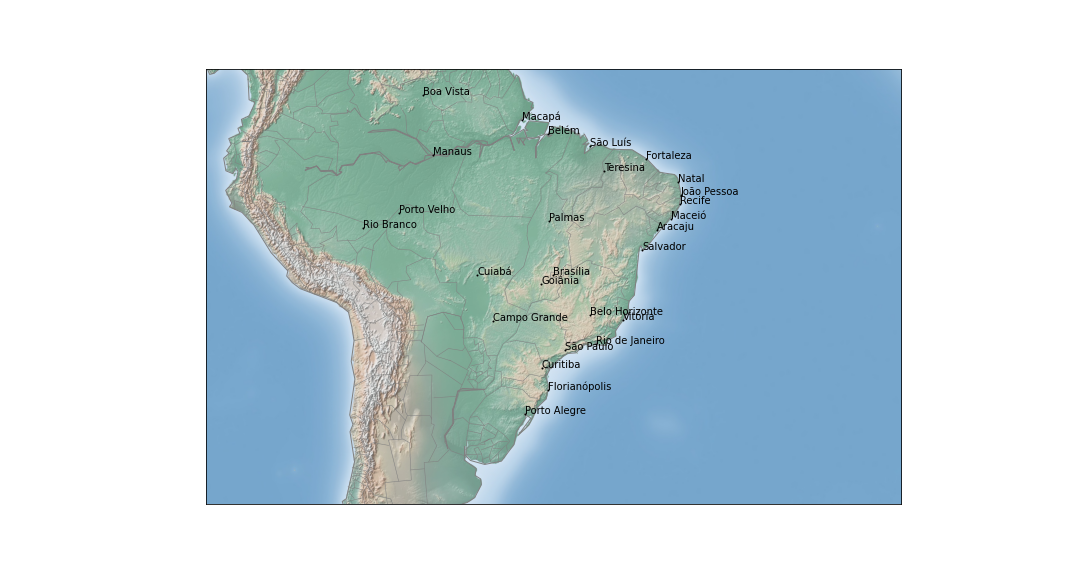

In [135]:

##### Salva figura
fig.savefig('teste.png')

# Carrega figura
Image('teste.png')

## Nuvem de palavras

In [136]:
pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [137]:
# https://www.datacamp.com/community/tutorials/wordcloud-python

from wordcloud import WordCloud

In [138]:
texto = world_happiness.Region.str.cat(sep=' ')

In [139]:
from collections import Counter
conta_palavras = Counter(texto.split())
conta_palavras = dict(conta_palavras)
del conta_palavras['and']
conta_palavras

{'Western': 21,
 'Europe': 50,
 'North': 2,
 'America': 26,
 'Australia': 2,
 'New': 2,
 'Zealand': 2,
 'Middle': 19,
 'East': 19,
 'Northern': 19,
 'Africa': 57,
 'Latin': 24,
 'Caribbean': 24,
 'Southeastern': 9,
 'Asia': 22,
 'Central': 29,
 'Eastern': 35,
 'Sub-Saharan': 38,
 'Southern': 7}

In [140]:
wordcloud = WordCloud(max_font_size=50, repeat=False, background_color="white").generate_from_frequencies(conta_palavras)

In [141]:
# https://github.com/amueller/word_cloud

#wordcloud = WordCloud(max_font_size=50, repeat=False, background_color="white").generate(texto)
plt.figure(figsize=figsize)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


<IPython.core.display.Javascript object>

## Radar Chart

In [142]:
world_happiness_ = world_happiness.loc[:,['Region', 
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual']]

world_happiness_.head()

,Region,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Western Europe,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Western Europe,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Western Europe,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Western Europe,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Western Europe,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [143]:
# copiado de https://python-graph-gallery.com/390-basic-radar-chart/


from math import pi
 
def radar_chart(df):
    # number of variable
    categories=list(df)[1:]
    N = len(categories)

    # We are going to plot the first line of the data frame.
    # But we need to repeat the first value to close the circular graph:
    values=df.loc[0].drop('Region').values.flatten().tolist()
    values += values[:1]
    values

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(111, polar=True)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.ylim(0,3)

    # Plot data
    ax.plot(angles, values, linewidth=1, linestyle='solid')

    # Fill area
    ax.fill(angles, values, 'b', alpha=0.1)

In [144]:
plt.figure(figsize=figsize)
radar_chart(world_happiness_)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>

## Rede

In [145]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
 
# Build a dataframe with 4 connections
df = pd.DataFrame({ 'from':['A', 'B', 'C','A'], 'to':['D', 'A', 'E','C']})
df
 
# Build your graph
G=nx.from_pandas_edgelist(df, source='from', target='to')
plt.figure(figsize=figsize)
# Plot it
nx.draw(G, with_labels=True)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':


<IPython.core.display.Javascript object>

# Referências

Livros usados como referência:

Introduction to Machine Learning with Python

Python Data Science Handbook (https://www.oreilly.com/library/view/python-data-science/9781491912126/)

Visualização:

https://python-graph-gallery.com/

http://www.apnorton.com/blog/2016/12/19/Visualizing-Multidimensional-Data-in-Python/

https://towardsdatascience.com/the-art-of-effective-visualization-of-multi-dimensional-data-6c7202990c57

https://www.oreilly.com/library/view/python-data-science/9781491912126/ch04.html

https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html